In [1]:
# Imports
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Data Collection
# seasonal data
df_seasonal = nfl.import_seasonal_data([2022])

In [3]:
df_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 618
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    619 non-null    object 
 1   season                       619 non-null    int64  
 2   season_type                  619 non-null    object 
 3   completions                  619 non-null    int32  
 4   attempts                     619 non-null    int32  
 5   passing_yards                619 non-null    float64
 6   passing_tds                  619 non-null    int32  
 7   interceptions                619 non-null    float64
 8   sacks                        619 non-null    float64
 9   sack_yards                   619 non-null    float64
 10  sack_fumbles                 619 non-null    int32  
 11  sack_fumbles_lost            619 non-null    int32  
 12  passing_air_yards            619 non-null    float64
 13  passing_yards_after_

In [4]:
# null values in columns: rtd_sh, dom, w8dom
df_seasonal.isnull().sum()

player_id                       0
season                          0
season_type                     0
completions                     0
attempts                        0
passing_yards                   0
passing_tds                     0
interceptions                   0
sacks                           0
sack_yards                      0
sack_fumbles                    0
sack_fumbles_lost               0
passing_air_yards               0
passing_yards_after_catch       0
passing_first_downs             0
passing_epa                     0
passing_2pt_conversions         0
pacr                            0
dakota                          0
carries                         0
rushing_yards                   0
rushing_tds                     0
rushing_fumbles                 0
rushing_fumbles_lost            0
rushing_first_downs             0
rushing_epa                     0
rushing_2pt_conversions         0
receptions                      0
targets                         0
receiving_yard

In [5]:
df_seasonal.head()

,player_id,season,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,...,yac_sh,wopr_y,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh
0,00-0019596,2022,REG,490,733,4694.0,25,9.0,22.0,160.0,...,0.000000,0.004477,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.175012
1,00-0022824,2022,REG,1,1,4.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,NaN,0.000000,0.0000,NaN,NaN,0.000000,0.002352
2,00-0023459,2022,REG,350,542,3695.0,26,12.0,32.0,258.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.166585
3,00-0024243,2022,REG,0,0,0.0,0,0.0,0.0,0.0,...,0.020528,0.078860,0.047619,0.222222,0.070423,0.0875,0.134921,0.08254,0.328358,0.051556
4,00-0026143,2022,REG,309,461,3057.0,14,13.0,38.0,287.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.155439


In [6]:
columns_to_drop = ['season_type', 'sacks', 'passing_first_downs', 'sack_fumbles', 'sack_fumbles_lost', 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_fumbles', 'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_first_downs', 'special_teams_tds',
                  'passing_air_yards', 'passing_yards_after_catch', 'passing_epa', 'pacr', 'dakota', 'sack_yards', 'rushing_epa', 'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_epa', 'racr', 'air_yards_share', 'wopr_x', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh', 'rfd_sh', 'rtdfd_sh', 'dom', 'w8dom', 'yptmpa', 'ppr_sh']

In [7]:
df_seasonal = df_seasonal.drop(columns=columns_to_drop)
df_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 618
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  619 non-null    object 
 1   season                     619 non-null    int64  
 2   completions                619 non-null    int32  
 3   attempts                   619 non-null    int32  
 4   passing_yards              619 non-null    float64
 5   passing_tds                619 non-null    int32  
 6   interceptions              619 non-null    float64
 7   passing_2pt_conversions    619 non-null    int32  
 8   carries                    619 non-null    int32  
 9   rushing_yards              619 non-null    float64
 10  rushing_tds                619 non-null    int32  
 11  rushing_2pt_conversions    619 non-null    int32  
 12  receptions                 619 non-null    int32  
 13  targets                    619 non-null    int32  

In [8]:
df_seasonal.isnull().sum()

player_id                    0
season                       0
completions                  0
attempts                     0
passing_yards                0
passing_tds                  0
interceptions                0
passing_2pt_conversions      0
carries                      0
rushing_yards                0
rushing_tds                  0
rushing_2pt_conversions      0
receptions                   0
targets                      0
receiving_yards              0
receiving_tds                0
receiving_2pt_conversions    0
target_share                 0
fantasy_points               0
fantasy_points_ppr           0
games                        0
dtype: int64

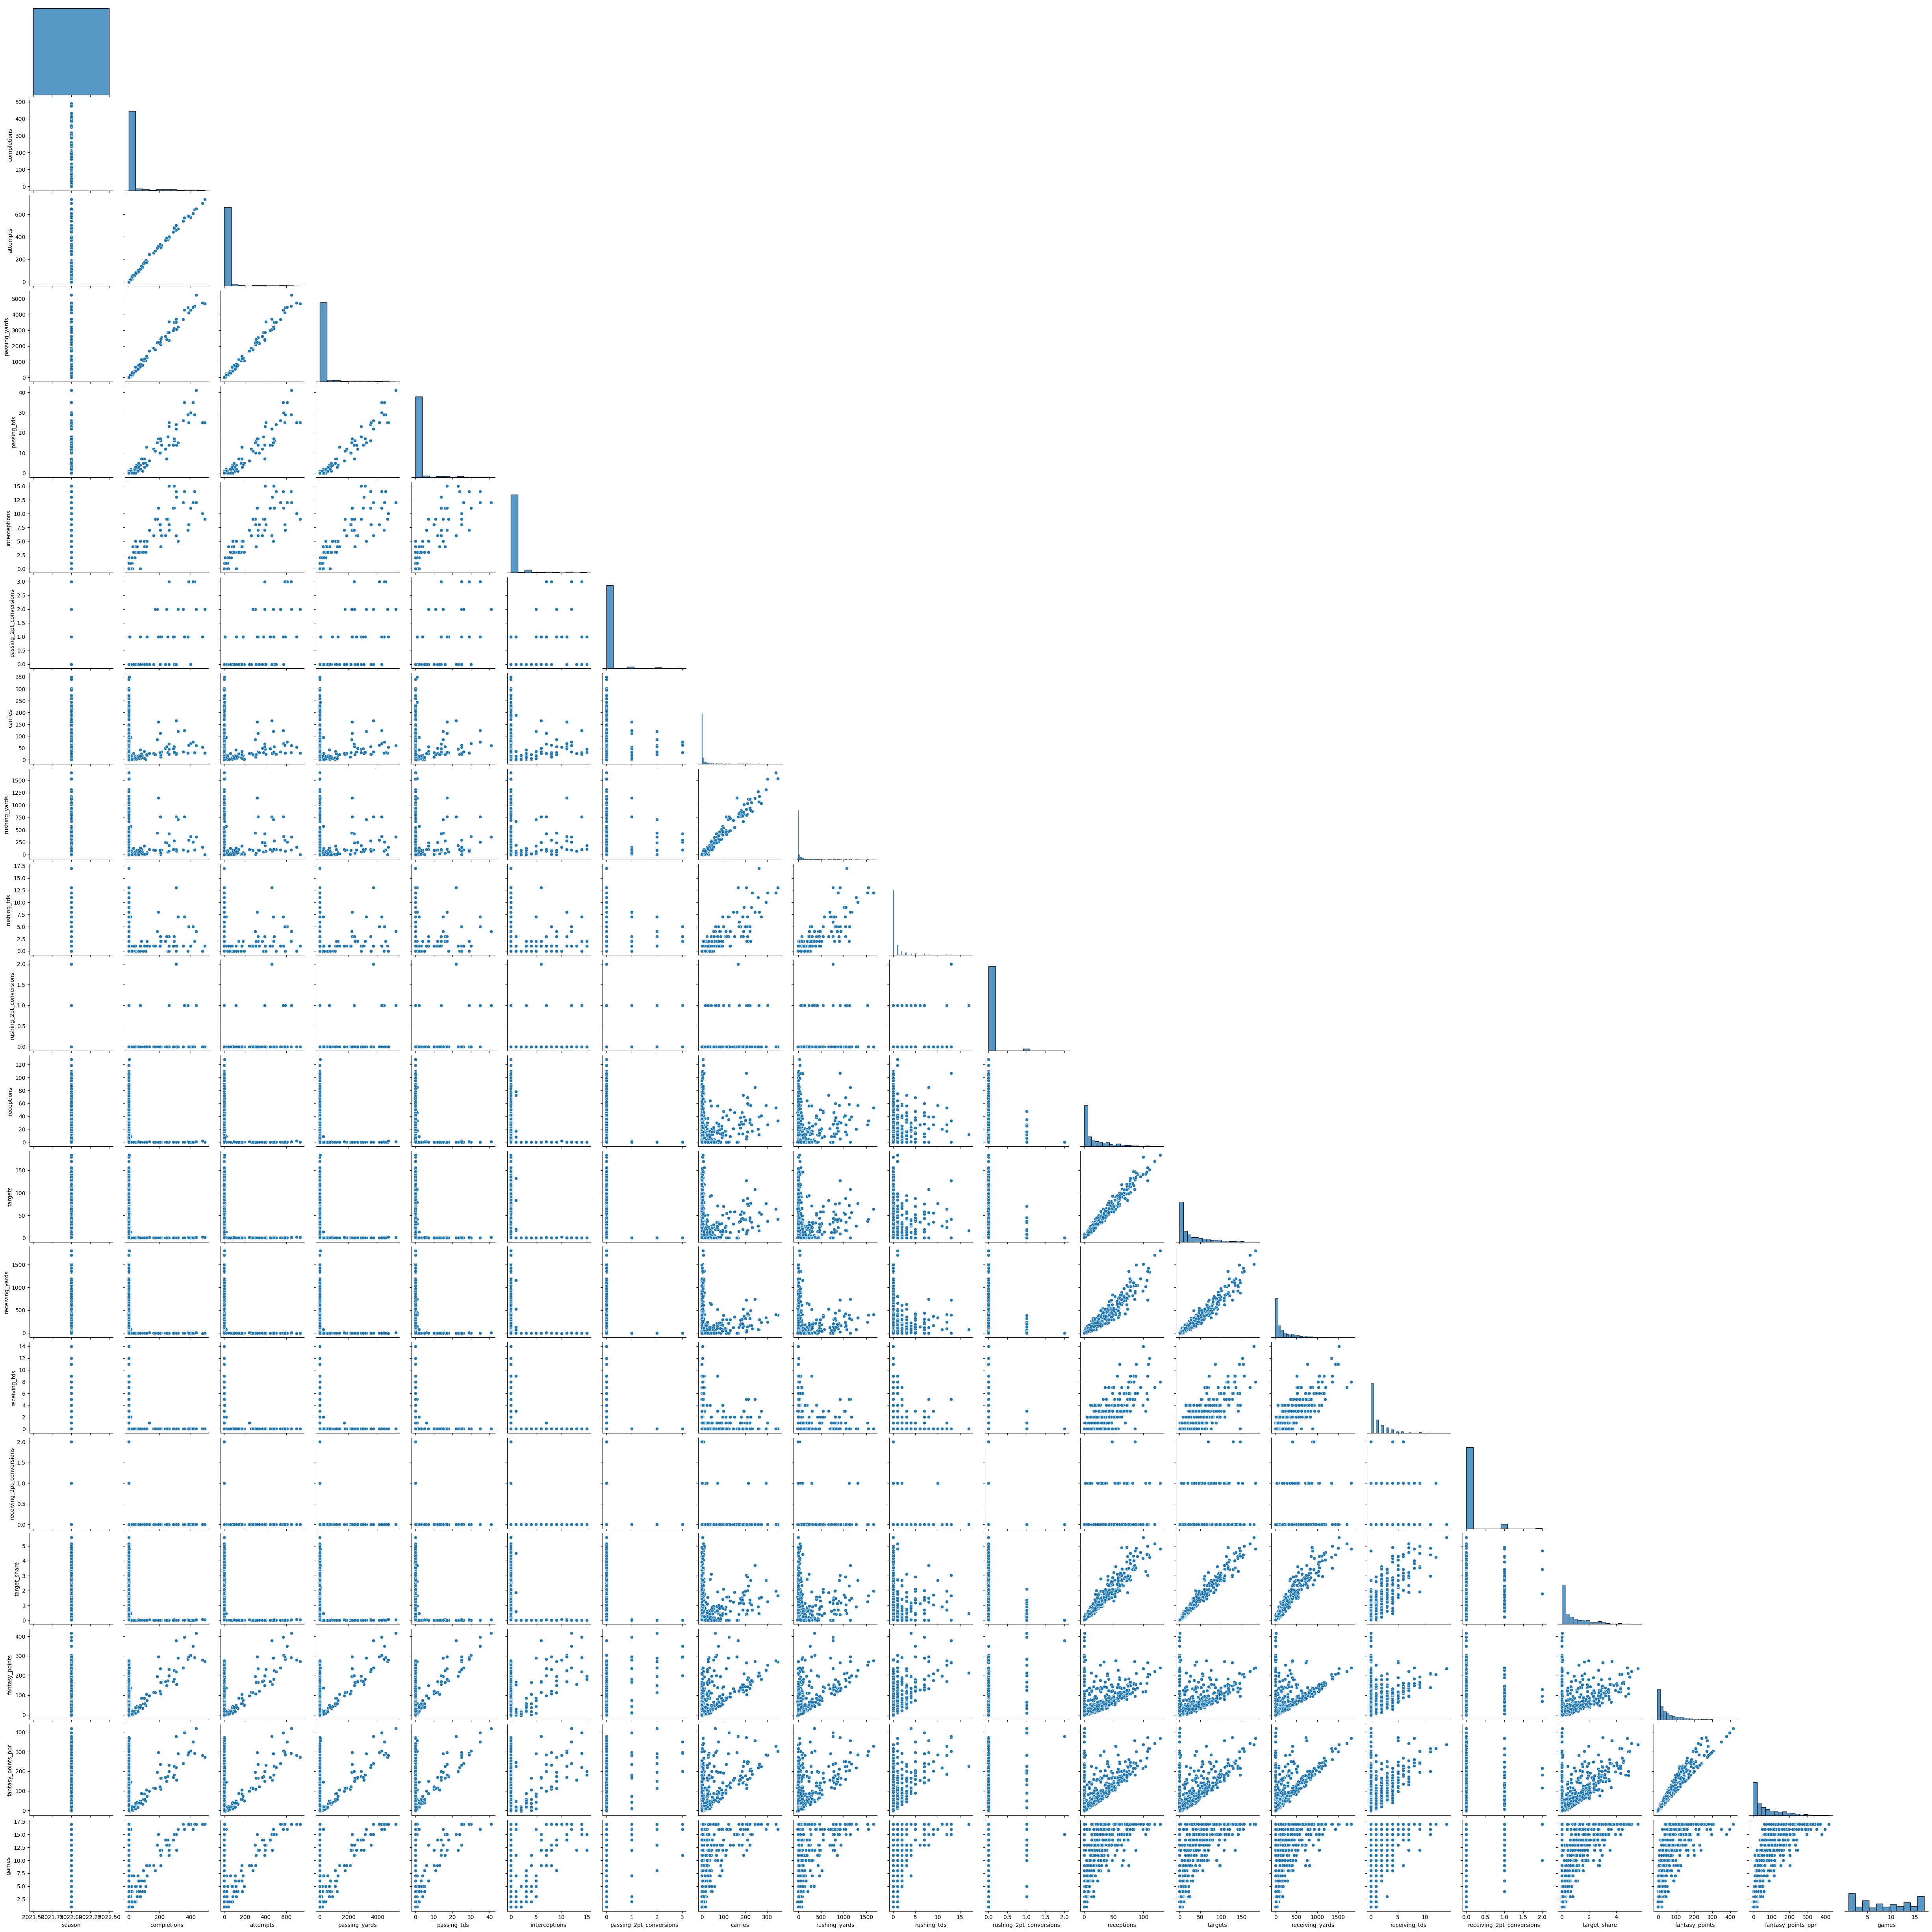

In [9]:
sns.pairplot(df_seasonal, corner=True)

<Axes: xlabel='receiving_yards', ylabel='receiving_tds'>

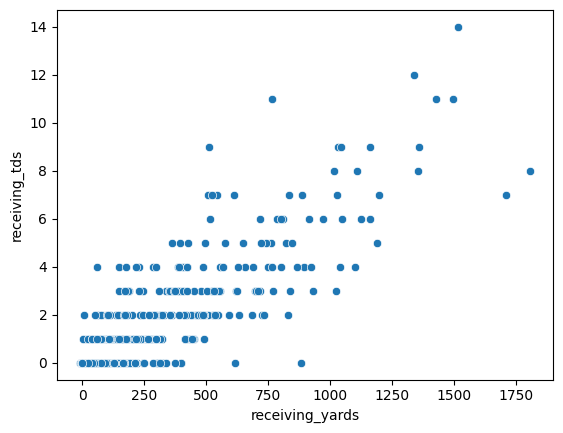

In [35]:
sns.scatterplot(x='receiving_yards', y='receiving_tds', data=df_seasonal)